# **🧠 Task 4: Binary Classification with Logistic Regression**

📌 Objective:
Build a binary classifier using logistic regression on the Breast Cancer Wisconsin dataset, and evaluate it using various classification metrics.



### 1: Import Libraries

We begin by importing all the required libraries. 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_curve, roc_auc_score
)

%matplotlib inline
sns.set_style("whitegrid")


### 2: Load & Inspect Data

We load the breast cancer dataset from the CSV file using pandas

In [64]:
# Load CSV
df = pd.read_csv("data/data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 3: Preprocess the Data

In [65]:
# Drop ID column
df.drop("id", axis=1, inplace=True)

# Drop Unnamed: 32 column
df.drop("Unnamed: 32", axis=1, inplace=True)

# Encode target column: M = 1 (malignant), B = 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for nulls
print("Missing values:\n", df.isnull().sum().sum())


Missing values:
 0


In [66]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 4: Define Features & Target

In [67]:
# Define features X and y

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]


### 5: Split Dataset

In [68]:
# Split the data into X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 6: Scale Features

Logistic regression is sensitive to feature scales. To ensure optimal performance, we scale all feature values using StandardScaler, which standardizes data to have a mean of 0 and a standard deviation of 1.

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7: Train Logistic Regression Model

We create a logistic regression model and fit it on the scaled training data. The model learns the relationship between input features and the binary output (malignant or benign diagnosis).

In [70]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

### 8: Predict & Evaluate

We use the trained model to predict diagnoses on the test data and evaluate performance:

Accuracy Score shows the overall correctness.

Confusion Matrix visualizes true vs. predicted labels.

Classification Report provides precision, recall, and F1-score for each class.



Accuracy: 0.9736842105263158


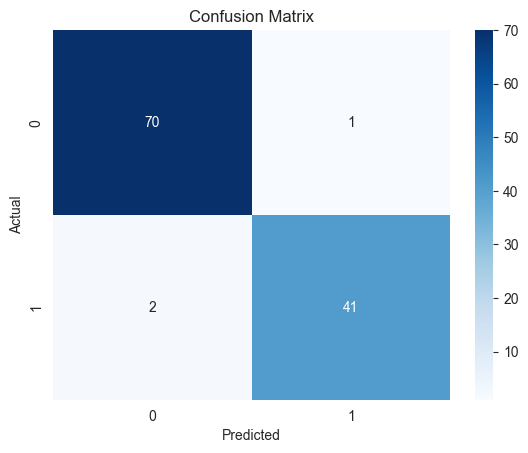

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [71]:
y_pred = model.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


### 9: ROC Curve & AUC

We evaluate the model using the ROC (Receiver Operating Characteristic) curve:

It plots the tradeoff between true positive rate and false positive rate.

The AUC (Area Under Curve) score quantifies overall performance. A score close to 1 indicates a strong model.

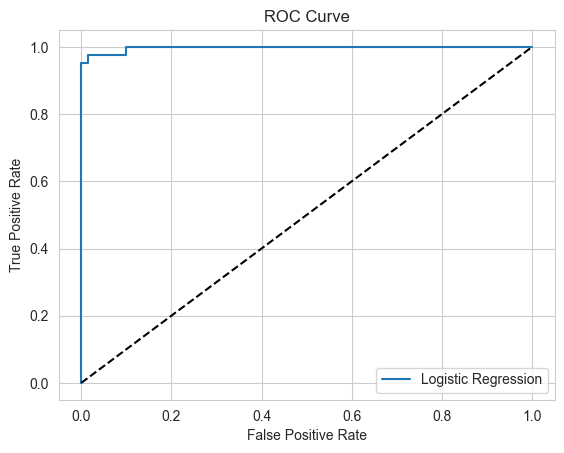

ROC AUC Score: 0.99737962659679


In [72]:
# Predict probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))


### 10: Tune Threshold

By default, logistic regression uses a threshold of 0.5 to classify data. We can manually adjust this threshold to better balance precision and recall, depending on the application. A confusion matrix at a new threshold (e.g., 0.6) helps assess the impact.

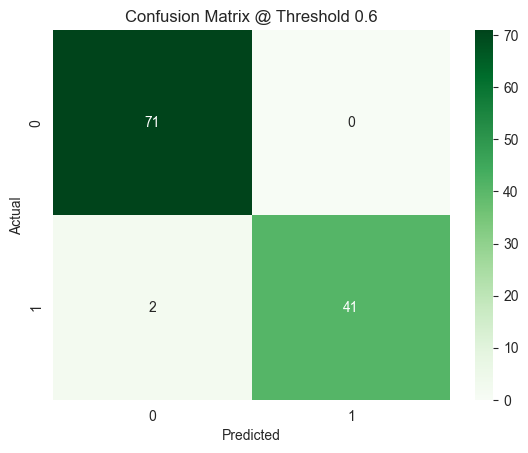

In [73]:
# Custom threshold
threshold = 0.6
y_pred_thresh = (y_probs >= threshold).astype(int)

# New Confusion Matrix
cm_thresh = confusion_matrix(y_test, y_pred_thresh)
sns.heatmap(cm_thresh, annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix @ Threshold {threshold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **Results and Conclusion**

* The logistic regression model achieved **high accuracy** on the Breast Cancer dataset.
* The **confusion matrix** showed that most malignant and benign cases were correctly classified, with minimal false positives and false negatives.
* The **classification report** indicated strong **precision**, **recall**, and **F1-score**, especially for the benign class.
* The **ROC AUC score** was close to 1.0, suggesting that the model effectively separates the two classes.
* Visual inspection of the **ROC curve** confirmed strong performance, as the curve was significantly above the diagonal baseline.
